In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import Optics
from HHG import ActiveGrating
import Graph

Grating = Optics.Grating()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
w0 = 1e-3
wt = 5e-15
lam = 800e-9
k = 2*np.pi/lam
c = 3e8
mu0 = 4*np.pi*1e-7
omega = k * c

IR = Optics.Pulse(w0=w0, lam=lam, wt=wt)

d = -IR.zR*1

grid = IR.Grid(Lx=w0*30, Ly=wt*30, Nx=801, Ny=801)
dx = grid[0][0][1] - grid[0][0][0]
dt = grid[1][1][0] - grid[1][0][0]
STOV = IR.LG_STOV(grid[0], 0, grid[1], l=-3, p=0)

In [61]:
"x-polarized STOV"
Ex = STOV
Ey = STOV * 0
Ez =  (1j/k) * np.gradient(STOV, dx, axis=1) 

Bx = STOV * 0
By = STOV / c
Bz = STOV * 0 # at the y=0 plane, no Bz due to symmetry

In [62]:
"Momenta"
Px = np.real(Ey*np.conj(Bz)-Ez*np.conj(By))/mu0/2
Pz = np.real(Ex*np.conj(By)-Ey*np.conj(Bx))/mu0/2

POx = np.imag(np.conj(Ex)*np.gradient(Ex, dx, axis=1) + np.conj(Ez)*np.gradient(Ez, dx, axis=1))/mu0/2/omega
POz = np.imag(np.conj(Ex)*np.gradient(Ex, dt, axis=0) + np.conj(Ez)*np.gradient(Ez, dt, axis=0))/mu0/2/omega/c

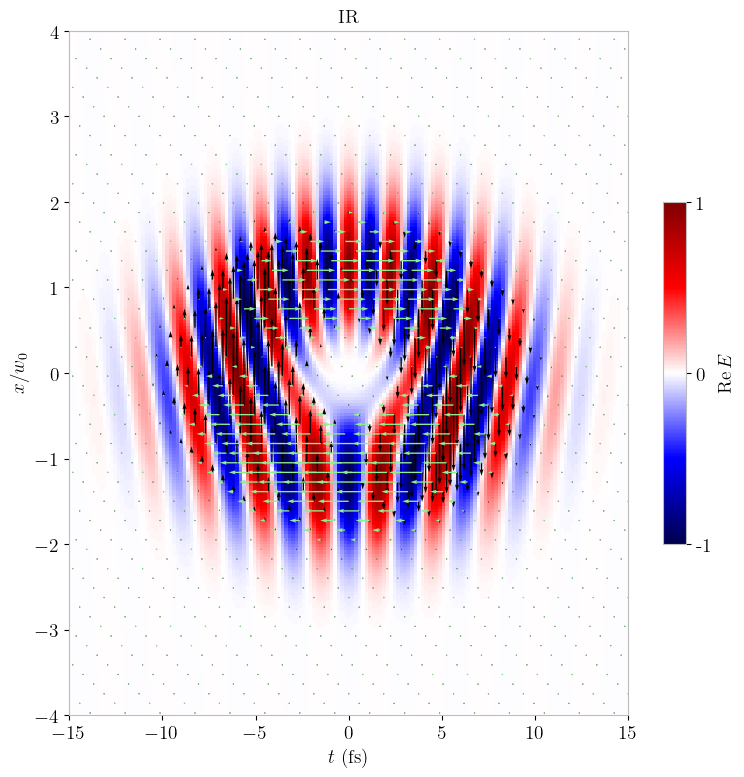

In [84]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, tight_layout=True, figsize=(8, 8))

x, t = grid[0][0], grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
t = t/1e-15
extent=[t[0], t[-1], x[0], x[-1]]

im = ax.imshow(np.real(STOV).T/np.max(np.real(STOV)), cmap='seismic', aspect='auto', extent=extent, vmin=-1, vmax=1)

s=30
ax.quiver(grid[1].flatten()[::s]/1e-15, grid[0].flatten()[::s]/IR.w0, Pz.flatten()[::s]*0, Px.flatten()[::s], scale=1e-6)

ax.quiver(grid[1].flatten()[::s]/1e-15, grid[0].flatten()[::s]/IR.w0, (POz-Pz).flatten()[::s], POx.flatten()[::s], scale=1e-3, color='lightgreen')

cbar = plt.colorbar(im, orientation='vertical', ticks=[-1, 0, 1], shrink=0.5, aspect=15)
cbar.ax.set_yticklabels(['-1', '0', '1'])
cbar.ax.set_ylabel('$\Re E$')

Xm = 3*wt/1e-15
ax.set_xlim(-Xm, Xm)
ax.set_ylim(-4, 4)

ax.set_xlabel('$t \ \mathrm{(fs)}$')
ax.set_ylabel('$x/w_0$')

#ax.set_xticks([-40, -20, 0, 20, 40], [-40, -20, 0, 20, 40])
#ax.set_yticks([-2, -1, 0, 1, 2], [-2, -1, 0, 1, 2])

ax.set_title('IR')

plt.show()

In [50]:
np.shape(Px.flatten())

(4004001,)

In [45]:
np.shape(grid)

(2, 2001, 2001)